In [4]:
import pandas as pd
import numpy as np 
# import os
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


In [5]:
from sklearn.model_selection import train_test_split


In [6]:
df=pd.read_csv(r'Downloads/Fraud.csv')

In [7]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [8]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [10]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


"""
### There are several assumptions associated with classification algorithms:

Well-defined classes: The assumption that the data can be categorized into distinct classes is fundamental to classification. Each instance must belong to one and only one class.

Relevance of features: It is assumed that the features used for classification are relevant and contribute to the discrimination between different classes. Irrelevant or redundant features can negatively impact the performance of a classification model.

Independence of instances: Many classification algorithms assume that instances are independent of each other. This means that the presence or absence of a particular class label for one instance does not affect the presence or absence of that label for another instance.

Quality and quantity of data: The performance of a classification model is highly dependent on the quality and quantity of the training data. Sufficient and representative data are needed to train a model that generalizes well to new, unseen instances.

Balance of classes: Classification algorithms often assume that the classes are balanced, meaning there is a relatively equal distribution of instances across different classes. Imbalanced classes can lead to biased models, where the classifier might be more inclined to predict the majority class.

Homogeneous instances: Instances within the same class are assumed to be homogeneous, i.e., they share similar characteristics. This assumption allows the model to learn patterns and relationships within each class.

Stationarity: The assumption that the statistical properties of the data, such as mean and variance, remain constant over time. If the distribution of the data changes, the model may become less accurate.

Noisy data: Classification algorithms assume that the training data is not overly noisy. Noise, in the form of errors or outliers, can introduce confusion and affect the model's ability to generalize.
"""

In [11]:
df.isnull().sum() #there is no any null or missing value

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [12]:
# data encoding
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [13]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [13]:
#name origin and name Dest ---(drop)() see later::

In [17]:

df1=df.drop(['nameOrig','nameDest'],axis=1)

In [18]:
df1

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,0


In [19]:
#encoding:
df1['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [20]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [21]:
# data exploration
type=df1['type'].value_counts()


In [22]:

transactions=type.index

In [23]:
quantity=type.values


In [24]:

import plotly.express as px
px.pie(df1,values=quantity,names=transactions,hole=0.4,title="Distribution of Transaction Type")

In [25]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [26]:
df1['type']=df1['type'].map({'PAYMENT':1,'TRANSFER':2,'CASH_OUT':3,'DEBIT':4,'CASH_IN':5})

In [27]:
df1['type']

0          1
1          1
2          2
3          3
4          1
          ..
6362615    3
6362616    2
6362617    3
6362618    2
6362619    3
Name: type, Length: 6362620, dtype: int64

In [28]:
df1

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,2,181.00,181.00,0.00,0.00,0.00,1,0
3,1,3,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,1,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,3,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,2,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,3,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,2,850002.52,850002.52,0.00,0.00,0.00,1,0


In [29]:
df1['isFraud'].unique()

array([0, 1], dtype=int64)

In [30]:
df1['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='isFraud', ylabel='count'>

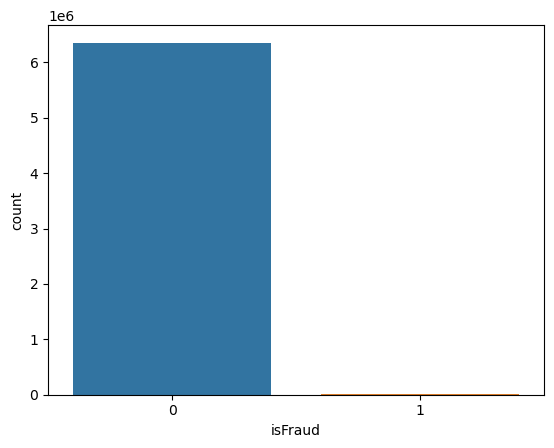

In [31]:
sns.countplot(df1['isFraud'])

In [32]:
!pip install imblearn


In [33]:
from imblearn.over_sampling import RandomOverSampler

In [34]:
obj = RandomOverSampler(sampling_strategy=0.70)


In [35]:
x=df1.iloc[:,0:7]

In [36]:
x

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,1,9839.64,170136.00,160296.36,0.00,0.00
1,1,1,1864.28,21249.00,19384.72,0.00,0.00
2,1,2,181.00,181.00,0.00,0.00,0.00
3,1,3,181.00,181.00,0.00,21182.00,0.00
4,1,1,11668.14,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...,...
6362615,743,3,339682.13,339682.13,0.00,0.00,339682.13
6362616,743,2,6311409.28,6311409.28,0.00,0.00,0.00
6362617,743,3,6311409.28,6311409.28,0.00,68488.84,6379898.11
6362618,743,2,850002.52,850002.52,0.00,0.00,0.00


In [37]:
df1

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,2,181.00,181.00,0.00,0.00,0.00,1,0
3,1,3,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,1,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,3,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,743,2,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,743,3,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,743,2,850002.52,850002.52,0.00,0.00,0.00,1,0


In [38]:
y=df1['isFraud']

In [39]:
X_new,y_new = obj.fit_resample(x,y)

In [40]:
y.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [41]:
y_new.value_counts()

0    6354407
1    4448084
Name: isFraud, dtype: int64

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='isFraud', ylabel='count'>

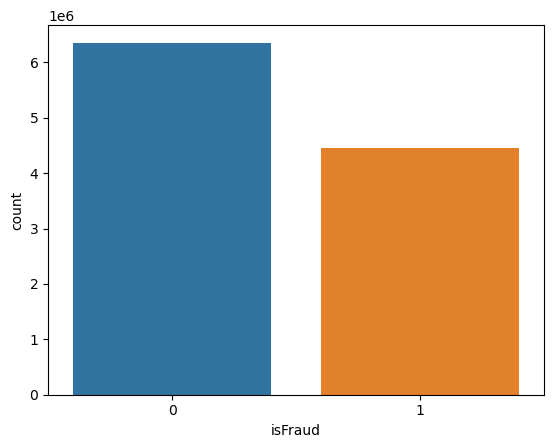

In [42]:
sns.countplot(y_new)

In [43]:
df1['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [44]:
# finding outliers:

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='amount'>

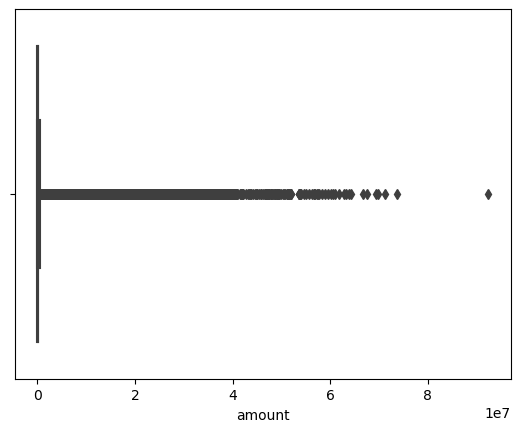

In [45]:
# Box Plot
import seaborn as sns
sns.boxplot(df1['amount'])

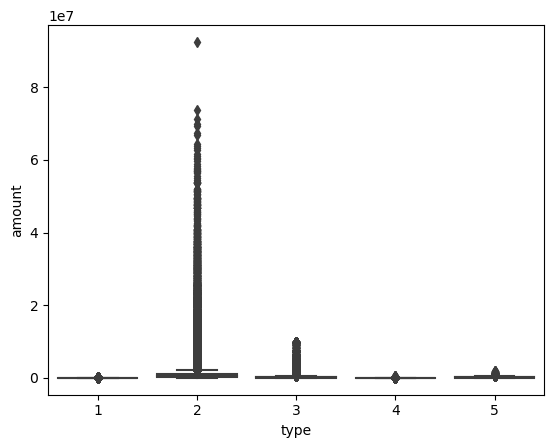

In [46]:
sns.boxplot(data=df1,y='amount',x='type')
plt.show()

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='oldbalanceOrg'>

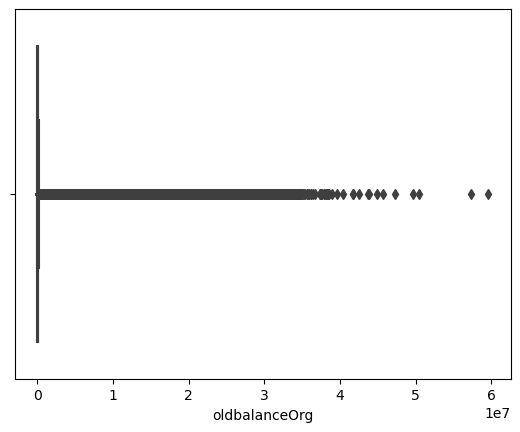

In [47]:
sns.boxplot(df1['oldbalanceOrg'])

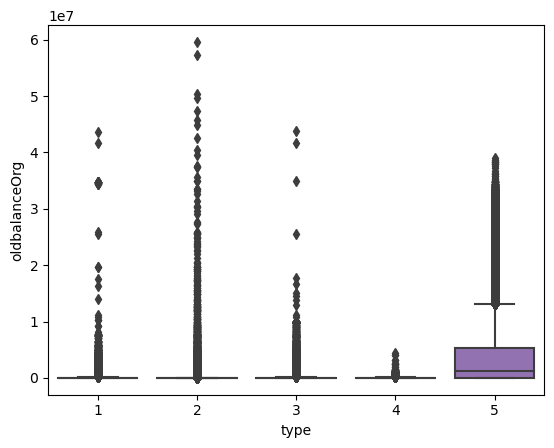

In [48]:
sns.boxplot(data=df1,y='oldbalanceOrg',x='type')
plt.show()

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='newbalanceOrig'>

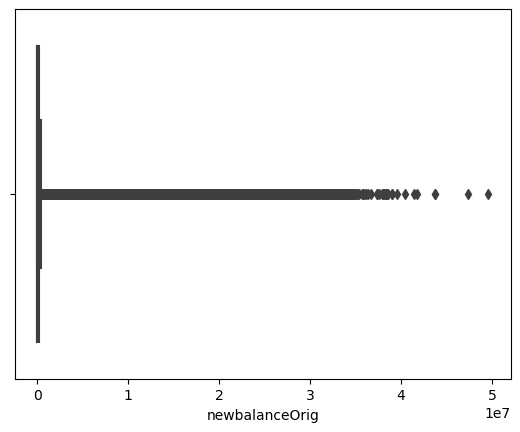

In [49]:
sns.boxplot(df1['newbalanceOrig'])

<AxesSubplot:xlabel='type', ylabel='newbalanceOrig'>

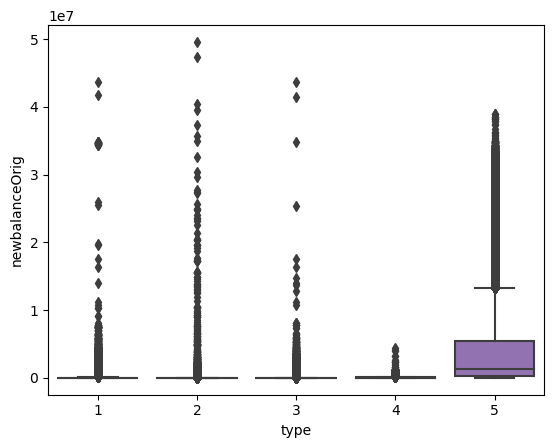

In [50]:
sns.boxplot(data=df1, y ='newbalanceOrig' , x ='type')

<AxesSubplot:xlabel='type', ylabel='isFraud'>

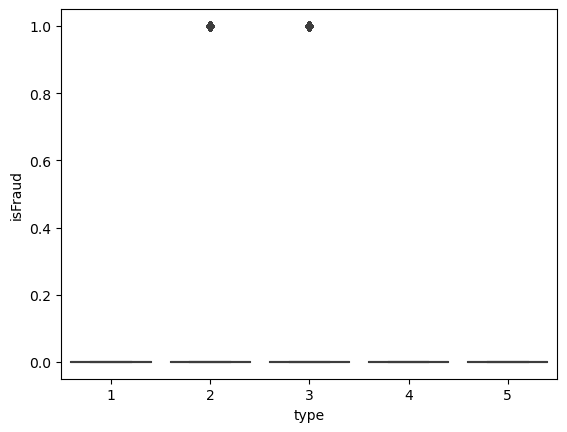

In [51]:
sns.boxplot(data=df1, y ='isFraud' , x ='type')

In [52]:
## removing outlier by IQR

In [53]:
percentile25 = df1['oldbalanceOrg'].quantile(0.25)
percentile75 = df1['oldbalanceOrg'].quantile(0.75)

In [54]:



IQR = percentile75 - percentile25

In [55]:
uper_limit = percentile75 + 1.5 * IQR

In [56]:
lower_limit = percentile25 - 1.5 * IQR

In [57]:
df2=df1[df1['oldbalanceOrg'] < uper_limit]

In [58]:
df2

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,2,181.00,181.00,0.00,0.00,0.00,1,0
3,1,3,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,1,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362605,742,3,54652.46,54652.46,0.00,0.00,54652.46,1,0
6362608,742,2,258355.42,258355.42,0.00,0.00,0.00,1,0
6362609,742,3,258355.42,258355.42,0.00,25176.67,283532.09,1,0
6362610,742,2,63416.99,63416.99,0.00,0.00,0.00,1,0


In [59]:
df1[df1['oldbalanceOrg'] <  lower_limit]

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [60]:
percentile25 = df2['newbalanceOrig'].quantile(0.25)
percentile75 = df2['newbalanceOrig'].quantile(0.75)

In [61]:
IQR = percentile75 - percentile25

In [62]:
uper_limit = percentile75 + 1.5 * IQR

In [63]:
lower_limit = percentile25 - 1.5 * IQR

In [64]:
df3=df2[df2['newbalanceOrig'] < uper_limit]

In [65]:
df3

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1,1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,2,181.00,181.00,0.00,0.00,0.00,1,0
3,1,3,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,1,11668.14,41554.00,29885.86,0.00,0.00,0,0
8,1,1,4024.36,2671.00,0.00,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362605,742,3,54652.46,54652.46,0.00,0.00,54652.46,1,0
6362608,742,2,258355.42,258355.42,0.00,0.00,0.00,1,0
6362609,742,3,258355.42,258355.42,0.00,25176.67,283532.09,1,0
6362610,742,2,63416.99,63416.99,0.00,0.00,0.00,1,0


In [66]:
percentile25 = df3['amount'].quantile(0.25)
percentile75 = df3['amount'].quantile(0.75)

In [67]:
IQR = percentile75 - percentile25

In [68]:
uper_limit = percentile75 + 1.5 * IQR

In [69]:
lower_limit = percentile25 - 1.5 * IQR

In [70]:
df4=df3[df3['amount'] < uper_limit]

In [71]:
df5=df4

In [72]:
df5

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1,1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,2,181.00,181.00,0.00,0.00,0.00,1,0
3,1,3,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,1,11668.14,41554.00,29885.86,0.00,0.00,0,0
8,1,1,4024.36,2671.00,0.00,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362605,742,3,54652.46,54652.46,0.00,0.00,54652.46,1,0
6362608,742,2,258355.42,258355.42,0.00,0.00,0.00,1,0
6362609,742,3,258355.42,258355.42,0.00,25176.67,283532.09,1,0
6362610,742,2,63416.99,63416.99,0.00,0.00,0.00,1,0


In [68]:
#Multicollinearity occurs when two or more independent variables have a high correlation with one another in a regression model,

In [85]:
data=pd.read_csv(r'Downloads/Fraud.csv')

In [86]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [87]:
# X = df.iloc[:,:-1]
# calc_vif(X)

In [88]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [89]:
X = df2.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,step,2.551136
1,type,3.140001
2,amount,4.862173
3,oldbalanceOrg,1.683953
4,newbalanceOrig,1.951217
5,oldbalanceDest,72.303448
6,newbalanceDest,87.414508
7,isFraud,1.003128


In [90]:
df2

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,2,181.00,181.00,0.00,0.00,0.00,1,0
3,1,3,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,1,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362605,742,3,54652.46,54652.46,0.00,0.00,54652.46,1,0
6362608,742,2,258355.42,258355.42,0.00,0.00,0.00,1,0
6362609,742,3,258355.42,258355.42,0.00,25176.67,283532.09,1,0
6362610,742,2,63416.99,63416.99,0.00,0.00,0.00,1,0


In [91]:
# Convert float column to int
df2['amount'] = df2['amount'].astype(int)
# Convert all float columns to int in the DataFrame
#df = df.astype(int)


In [92]:
X = df2.drop(['amount','isFraud'],axis=1)
calc_vif(X)

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning:

invalid value encountered in scalar divide



,variables,VIF
0,step,2.544734
1,type,3.131202
2,oldbalanceOrg,1.669717
3,newbalanceOrig,1.890397
4,oldbalanceDest,21.554773
5,newbalanceDest,21.784558
6,isFlaggedFraud,NaN


'''
### When you care more about how much each individual feature rather than a group of features affects the target variable, 
then removing multicollinearity may be a good option
If multicollinearity is not present in the features you are interested in, then multicollinearity may not be a problem.
'''

In [73]:
df5

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1,1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,2,181.00,181.00,0.00,0.00,0.00,1,0
3,1,3,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,1,11668.14,41554.00,29885.86,0.00,0.00,0,0
8,1,1,4024.36,2671.00,0.00,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362605,742,3,54652.46,54652.46,0.00,0.00,54652.46,1,0
6362608,742,2,258355.42,258355.42,0.00,0.00,0.00,1,0
6362609,742,3,258355.42,258355.42,0.00,25176.67,283532.09,1,0
6362610,742,2,63416.99,63416.99,0.00,0.00,0.00,1,0


In [74]:
x = df5[['type','amount','oldbalanceOrg','newbalanceOrig']]

In [75]:
x

,type,amount,oldbalanceOrg,newbalanceOrig
1,1,1864.28,21249.00,19384.72
2,2,181.00,181.00,0.00
3,3,181.00,181.00,0.00
4,1,11668.14,41554.00,29885.86
8,1,4024.36,2671.00,0.00
...,...,...,...,...
6362605,3,54652.46,54652.46,0.00
6362608,2,258355.42,258355.42,0.00
6362609,3,258355.42,258355.42,0.00
6362610,2,63416.99,63416.99,0.00


In [76]:
y=df5['isFraud']

In [77]:
y

1          0
2          1
3          1
4          0
8          0
          ..
6362605    1
6362608    1
6362609    1
6362610    1
6362611    1
Name: isFraud, Length: 3947217, dtype: int64

In [78]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
model=DecisionTreeClassifier()

In [81]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [82]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC

In [101]:
models=[]
results=[]
names=[]

In [106]:
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
#models.append(('SVM',SVC()))


In [107]:
models

[('LR', LogisticRegression()),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC()),
 ('LR', LogisticRegression()),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC())]

In [108]:
#model traning --checking multiple algorithm and select high accuracy model

In [ ]:
from sklearn import model_selection
for name,model in models:
  kfold=model_selection.KFold(n_splits=10,random_state=7,shuffle=True)
  cv_results=model_selection.cross_val_score(model,x,y,cv=kfold,scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg="%s: %f (%f)" %(name,cv_results.mean(),cv_results.std())
  print(msg)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\dell\anaconda3\lib\site-packages\sk

LR: 0.999328 (0.000053)
LDA: 0.984242 (0.000241)


C:\Users\dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\U

KNN: 0.999555 (0.000030)
CART: 0.999635 (0.000035)
NB: 0.938178 (0.000463)



### 5. Key Factors Predicting Fraudulent Customer:
 i)Identified Factors:
  ii)Display top features:


In [84]:
selected_features=x = df5[['type','amount','oldbalanceOrg','newbalanceOrig']]
# print("Top features predicting fraud:")
print(selected_features)

         type     amount  oldbalanceOrg  newbalanceOrig
1           1    1864.28       21249.00        19384.72
2           2     181.00         181.00            0.00
3           3     181.00         181.00            0.00
4           1   11668.14       41554.00        29885.86
8           1    4024.36        2671.00            0.00
...       ...        ...            ...             ...
6362605     3   54652.46       54652.46            0.00
6362608     2  258355.42      258355.42            0.00
6362609     3  258355.42      258355.42            0.00
6362610     2   63416.99       63416.99            0.00
6362611     3   63416.99       63416.99            0.00

[3947217 rows x 4 columns]



### 6. Interpretation of Factors:
Interpretation:
Analyze the selected features in the context of known fraud patterns and industry expertise.




#### 7. prevention :
1)Strong Password Policies::

Enforce strong password policies for all users. Require a combination of letters, numbers, and special characters.
Encourage regular password updates.

2)Multi-Factor Authentication (MFA)::

Implement MFA to add an extra layer of security. Require users to verify their identity using a second method,
such as a one-time code sent to their mobile device.

3)Employee Training::

Conduct simple and regular training sessions to educate employees about phishing threats, social engineering, 
and other common tactics used by fraudsters. Encourage a cautious approach to emails and communication

4)Transaction Verification::

Implement simple but effective transaction verification processes, especially for high-risk transactions. 
This may include additional confirmation steps or authorization from multiple parties.

5)Incident Response Plan::

Develop a straightforward incident response plan outlining the steps to be taken in case of a security incident. Ensure that employees know how to report suspicious activities promptly.

6)Encryption of Sensitive Data::

Encrypt sensitive data during storage and transmission. This provides an additional layer of protection, even if unauthorized access occurs.

7)Regular Backups::

Perform regular backups of critical data. This ensures that in case of a security incident or data loss, the organization can quickly recover without significant impact.

### 8. Post-Implementation Evaluation:
Evaluation:
Monitor fraud detection performance metrics regularly.
Analyze the frequency of fraud incidents and assess the effectiveness of preventive measures.
Consider A/B testing or experimental designs to compare the effectiveness of the new infrastructure.
Remember to customize these steps based on your specific dataset, objectives, and domain knowledge.
''''''

In [ ]:
#create pickel file for model deployment

In [ ]:

import pickle


pickle.dump(models,open('lgmodel.pkl','wb')) 
LGmodel= pickle.load(open('lgmodel.pkl','rb'))

### conclusion:
It increases profit for businesses by identifying fraudulent financial transactions.
Helps in maintaining business reputation and increasing customers.
ML tools help in providing accessible and better services.
Helps in providing good services and building trust with customers.